In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))

len(letters)=32
500


In [39]:
StatsDict: dict[str, dict] = {}

for inp_idx, inp_ltr in enumerate(input_str):
    if inp_idx == 0:
        continue

    prev_ltr = input_str[inp_idx - 1]
    
    prev_stats = StatsDict.setdefault(prev_ltr, {})
    prev_stats.setdefault(inp_ltr, 0)
    
    prev_stats[inp_ltr] += 1

In [40]:
TF = []
for inp in input_str:
    TF.append(len(StatsDict[inp]))
TF = np.array(TF)
print(TF.max(), TF.min())


22 1


22 0


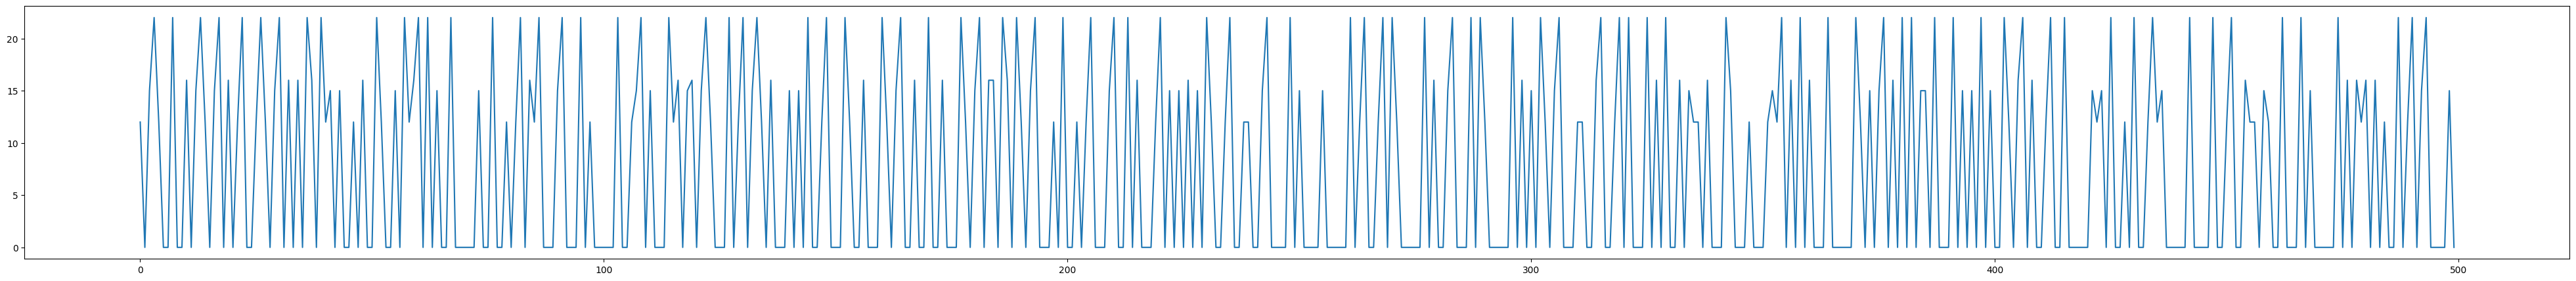

In [41]:
TF[np.where(TF <= np.mean(TF))] = 0
print(TF.max(), TF.min())

plt.figure(figsize=(50, 5))
plt.plot(np.arange(TF.size), TF)
plt.show()